<a href="https://colab.research.google.com/github/qli111/QSAR-COVID-19/blob/main/VAE_generation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install deepchem


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 47.4 MB/s eta 0:00:00


In [5]:
import deepchem as dc


In [6]:
tasks, datasets, transformers = dc.molnet.load_muv()

In [7]:
train_dataset, valid_dataset, test_dataset = datasets

In [8]:
train_smiles = train_dataset.ids

In [9]:
tokens = set()
for s in train_smiles:
  tokens = tokens.union(set(s))
tokens = sorted(list(tokens))
max_length = max(len(s) for s in train_smiles)

In [10]:
from deepchem.models.optimizers import ExponentialDecay

In [11]:
from deepchem.models.seqtoseq import AspuruGuzikAutoEncoder

In [12]:
batch_size = 100

In [13]:
batches_per_epoch = len(train_smiles)/batch_size

In [14]:
learning_rate = ExponentialDecay(0.001, 0.95, batches_per_epoch)

In [15]:
model = AspuruGuzikAutoEncoder(tokens, max_length, model_dir='vae', batch_size=batch_size, learning_rate=learning_rate)

In [16]:
def generate_sequences(epochs):
  for i in range(epochs):
    for s in train_smiles:
      yield (s, s)

In [17]:
model.fit_sequences(generate_sequences(10))

In [18]:
import numpy as np
from rdkit import Chem

In [19]:
predictions = model.predict_from_embeddings(np.random.normal(size=(1000,196)))
molecules = []

In [20]:
molecules = []
for p in predictions:
  smiles = ''.join(p)
  if Chem.MolFromSmiles(smiles) is not None:
    molecules.append(smiles)
print()
print('Generated molecules:')
for m in molecules:
  print(m)


Generated molecules:
C=C(cccccccccccccccccccccc1)CCCC1
Cc1cccccccccccccccCCCCCCCCCC1
Cc1cccCCCCCC1
C=C(cccccccccccccccccccccccc1CC)CC1
Cc1cccccccccccccccccCCCCCCCCCCCC1
Cc1cccccccccccccccccccccCCCCCCCCCC1
Cc1cccccccccccccccCCCCCCCCCCC1
Cc1cccccccccccccccccCCCCCCCCCCC1
CC1ccccccCCCCCCCCCCCCCCCCCCCCCCC1
Cc1cccccccccccccccccccccCCCCCCCCC1
Cc1cccccccCCCCCCC1
C=1ccccccccccccccccCCCCCCCC1
COC1cCCCCCCC1
Cc1cccccCCCCCCCCCCCCCCCCCCCCCCC1
C=1ccccccccccccccccccCCCCCCCCCC1
Cc1cCcCCCCCCCC1
Cc1cCcCCCCCCC1
Cc1cccccccccccccccccccCCCCCCCCC1
Cc1cccccccccccccccccCCCCCCCCCCC1
C=C(cccccccccccccccccccccc1CCC)CC1
CC1ccccccccCCCccccCCCCCCCCCCCCCCCC1
O=C(cccccccccccccccccccc1C)CC1
Cc1cccccccccccccccccCCCCCCCCCC1
Cc1cccccccccccccccccccccCCCCCCCCCC1
Cc1cccccccccccccCCCCCCCCCCCCCCC1
Cc1ccccccccccccccccccccccccccccc1
Cc1cccccccccccccccccccCCCCCCCCCC1
Cc1cccCCCCCCCCC1
Cc1cccccccccccccccccCCCCCCCCC1
Cc1cccCCCCCC1
Cc1cCCCCCCCC1
C=C(cccccccccccccccccc1CC)CC1
Cc1cccccccccccccccc11CCCCCC1
Cc1cccccccCCCCCCccccccCCCCCCCC

In [25]:
smiles_list = ['C=C(cccccccccccccccccccccc1)CCCC1',
'Cc1cccccccccccccccCCCCCCCCCC1',
'Cc1cccCCCCCC1',
'C=C(cccccccccccccccccccccccc1CC)CC1',
'Cc1cccccccccccccccccCCCCCCCCCCCC1',
'Cc1cccccccccccccccccccccCCCCCCCCCC1',
'Cc1cccccccccccccccCCCCCCCCCCC1',
'Cc1cccccccccccccccccCCCCCCCCCCC1',
'CC1ccccccCCCCCCCCCCCCCCCCCCCCCCC1',
'Cc1cccccccccccccccccccccCCCCCCCCC1',
'Cc1cccccccCCCCCCC1',
'C=1ccccccccccccccccCCCCCCCC1',
'COC1cCCCCCCC1',
'Cc1cccccCCCCCCCCCCCCCCCCCCCCCCC1',
'C=1ccccccccccccccccccCCCCCCCCCC1',
'Cc1cCcCCCCCCCC1',
'Cc1cCcCCCCCCC1',
'Cc1cccccccccccccccccccCCCCCCCCC1',
'Cc1cccccccccccccccccCCCCCCCCCCC1',
'C=C(cccccccccccccccccccccc1CCC)CC1',
'CC1ccccccccCCCccccCCCCCCCCCCCCCCCC1',
'O=C(cccccccccccccccccccc1C)CC1',
'Cc1cccccccccccccccccCCCCCCCCCC1',
'Cc1cccccccccccccccccccccCCCCCCCCCC1',
'Cc1cccccccccccccCCCCCCCCCCCCCCC1',
'Cc1ccccccccccccccccccccccccccccc1',
'Cc1cccccccccccccccccccCCCCCCCCCC1',
'Cc1cccCCCCCCCCC1',
'Cc1cccccccccccccccccCCCCCCCCC1',
'Cc1cccCCCCCC1',
'Cc1cCCCCCCCC1',
'C=C(cccccccccccccccccc1CC)CC1',
'Cc1cccccccccccccccc11CCCCCC1',
'Cc1cccccccCCCCCCccccccCCCCCCCCCCC1',
'Cc1cccccccccccccccccccccCCCCCCCCC1',
'C=C(cccccccccccccccccccc1CC)CC1',
'Cc1ccccccccccccccccccccccccccc1',
'Cc1cccccccccccccccccccccCCCCCCCCCCCC1']

In [26]:
molecules = [Chem.MolFromSmiles(x) for x in smiles_list]

In [27]:
print(sorted([x.GetNumAtoms() for x in molecules]))

[11, 11, 11, 11, 12, 13, 14, 16, 24, 24, 25, 25, 26, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 35]


In [28]:
good_mol_list = [x for x in molecules if x.GetNumAtoms() > 10 and x.GetNumAtoms() < 50]

In [29]:
print(len(good_mol_list))

38


In [31]:
from rdkit import rdBase, Chem

In [32]:
from rdkit.Chem import PandasTools, QED, Descriptors, rdMolDescriptors

In [33]:
qed_list = [QED.qed(x) for x in good_mol_list]

In [36]:
final_mol_list = [(a,b) for a,b in zip(good_mol_list, qed_list) if b > 0.5 ]

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

In [39]:
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [41]:
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

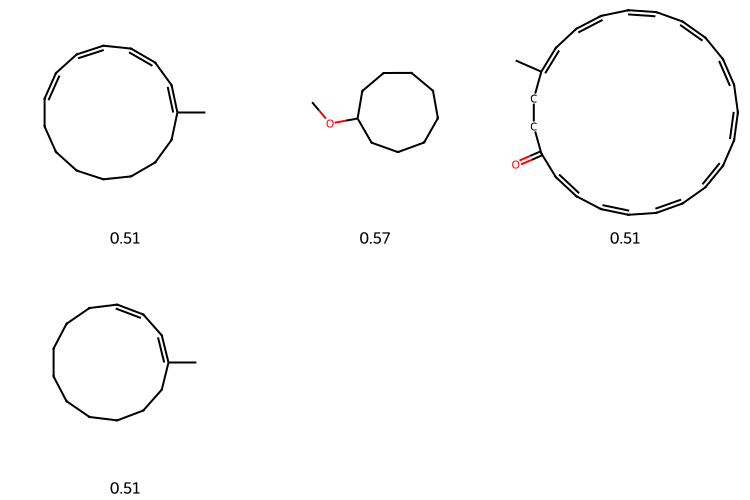

In [42]:
MolsToGridImage([x[0] for x in final_mol_list],
                molsPerRow=3, useSVG=True,
                subImgSize=(250, 250),
                legends=[f"{x[1]:.2f}" for x in final_mol_list])